## Machine Learning and Artificial Intelligence

Machine learning is a part of Artificial Intelligence. Some of its aspect include predicting, learning, deciding, remembering (past data), analyzing, and reorganizing data. This is what happen behind the stage, it is important to remember when we use the term artificial intelligence too much, that 'AI' is considered by large masses to be some kind of conscious being. 

In fact, machine learning and deep learning are the ground for artificial intelligence. Both use the past data to make prediction about future data. Machine learning particularly is an application of Artificial Intelligence where in the system gets the ability to automatically learn and improve based on its experience. 

## Machine Learning types

There are three types of Machine Learning which is:\
1) Supervised Learning\
We have past data (feature columns) and its answer (target column)

2) Unsupervised Learning \
We have past data (feature columns) but we don't have its answer (target column)\

3) Reinforcement Learning\
We do not have past data but use the data one line at the time\

## Problems in Machine Learning

(1) Classification\
Problem with categorical solutions, like "yes" or "no", "true" or "false"

For simpler data, we can use Naive-Bayes Classifier or Logistic Regression.\
FOr complex data, we can use Decision Tree or Random Forest.

(2) Regression \
Continuous value needs to be predicted like "product price" and "profit"

(3) Clustering\
Problem wherein the data need to be organized to find the specific patterns like the case of "product recommendation"


 ## Machine Learning - Decision Tree
 
 We are are going to look into the problem of classification in Machine Learning using decision tree.
 
 < Overview >
 
 Decision tree is tree shaped diagram used to determine a course of action. Each branch og tree represent a possible decision, or occurance of reaction. In essence, decision tree determine a set of logic if-then conditions to classify problems by certain feature.
 
 < Advantage of Decison Tree >
 
 1. Simple to understand, interpret and visualize
 2. Little data preparation
 3. Can be used both on numerical and categorical data
 4. Non-linear regression does not affect performance
 
 < Disadvantage of Decision Tree > 
 1. Overfittiing: Algorithm capture the noice in the data
 2. High Variance: Model can get unstable due to small variation in data
 3. Low biased tree: Complicated data make it difficult for model to work with new data
 
 < Important terms in decision tree >
 
 1. Entropy: Measure of randomness/unpredictibility in dataset
 
 In Machine Learning, entropy is quantitative measure of the randomness of the information being processed.
 
 High Entropy Value: randomness in the system is high, making accurate prediction tough\
 Low Entropy Value: randomness in the system is low, making accurate prediction is easier
 
 
 2. Information gain: Measure of decrease in entropy after dataset is split
 
 In Machine Learning, information gain is the measure of how much information a feature provided about a class. Low entropy leads to increase information gain. High entropy leads to low information gain. Information gain is computed by the difference between entropy before split and average entropy after split of the dataset based on given feature.

 3. Gini Impurity

Gain impurity is the measure of how much impurity in the data(node).\
The split made in decision tree is said to be "pure" if all the data are accurately separated into different classes. Gini impurity measures the likelihood that a randomly selected data points would be incorrectly classified by a specific node.


 4. Leaf node: The decision node
 
 5. Root node: Top most decision node

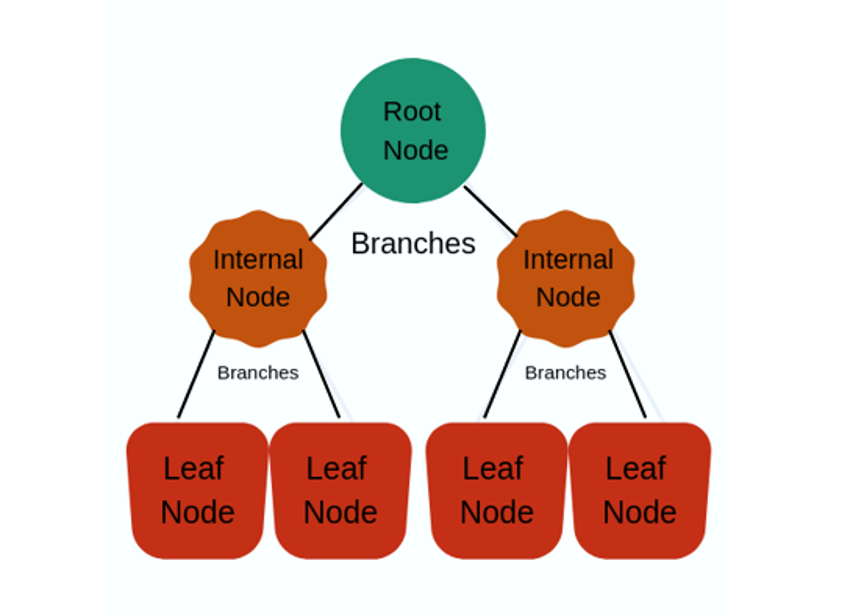

< How decision tree work >

We want to classify different types of items/people/targets based on their features using decision tree. So we have to frame the conditions that split the data in such a way that the information gain is highest. Remember than information gain is the measure of decrease in entropy after splitting. The steps are as below:

1. We will calculate the entropy of the dataset similarly after every split to calculate the gain.
2. Gain can be calculated by finding the difference of the subsequent entropy values after split
3. Then we have to choose the conditions that give the highest gain
4. Split the data using each conditions and check the gain that we get out of them
5. The condition that give us the highest gain is used to make the first split. Next highest gain is used to make the second split and so on.


< How to calculate entropy and gini impurity value >

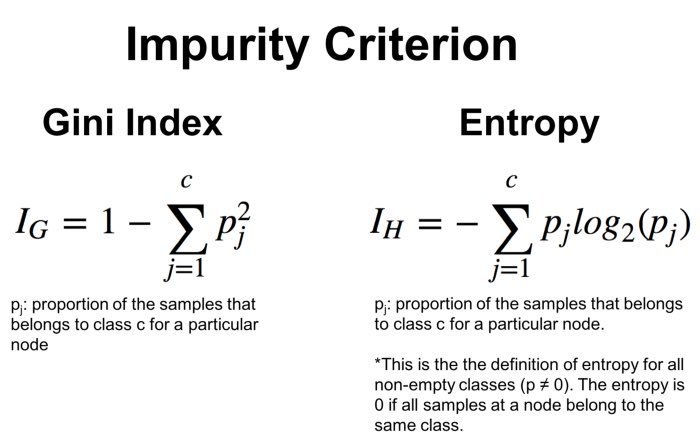

# Decision Tree [Project 1: Iris flower species prediction]

#### Problem Statement
Flower species prediction (Iris Dataset)

Problem Statement:\
As a data analyst, we have to analyze some samples of flower to make prediction about random flower given its features.
The features of the flowers are sepal length, sepal width, petal length and petal width. All these features are in centimeters unit. Refer below to the images of each flower species.
 
Algorithm:\
Predict the species of a random flower given its features using decision tree algorithm in python

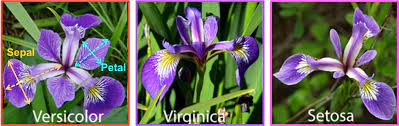

#### Import packages

In [7]:
# import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # split data: train data and test data
from sklearn.tree import DecisionTreeClassifier # the decision tree algorithm
from sklearn.metrics import accuracy_score # accuracy score metrics
from sklearn import tree

%matplotlib inline

#### Load dataset

In [21]:
# load dataset
# use df.dropna() ti remove any missing value when needed

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# load target column to the data table
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# see the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


#### Descriptive statistics

In [23]:
# descriptive statistic of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [24]:
# dataset length and shape
print("Dataset Length: ", len(df))
print("Dataset Shape: ", df.shape)

Dataset Length:  150
Dataset Shape:  (150, 5)


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


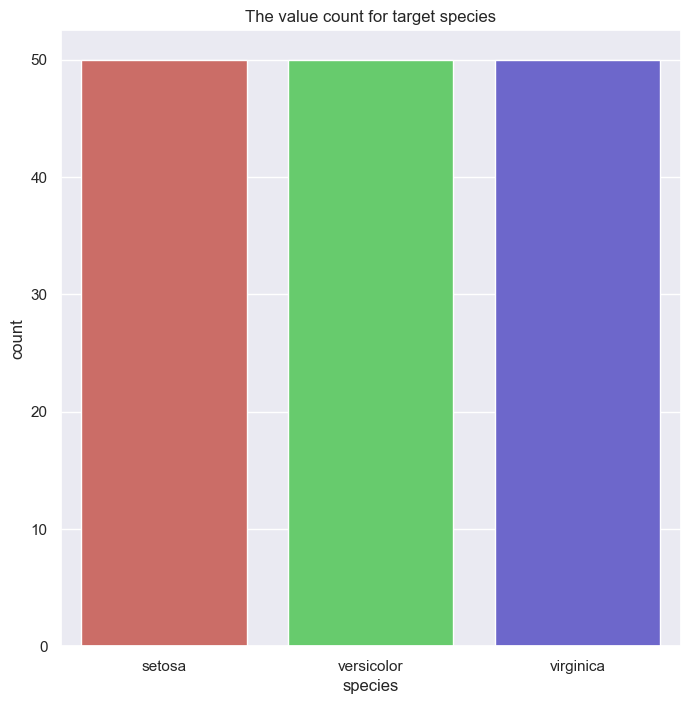

In [25]:
print(df['species'].value_counts())

sns.countplot(x='species',data = df, palette='hls',order = df['species'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('The value count for target species')
plt.show()

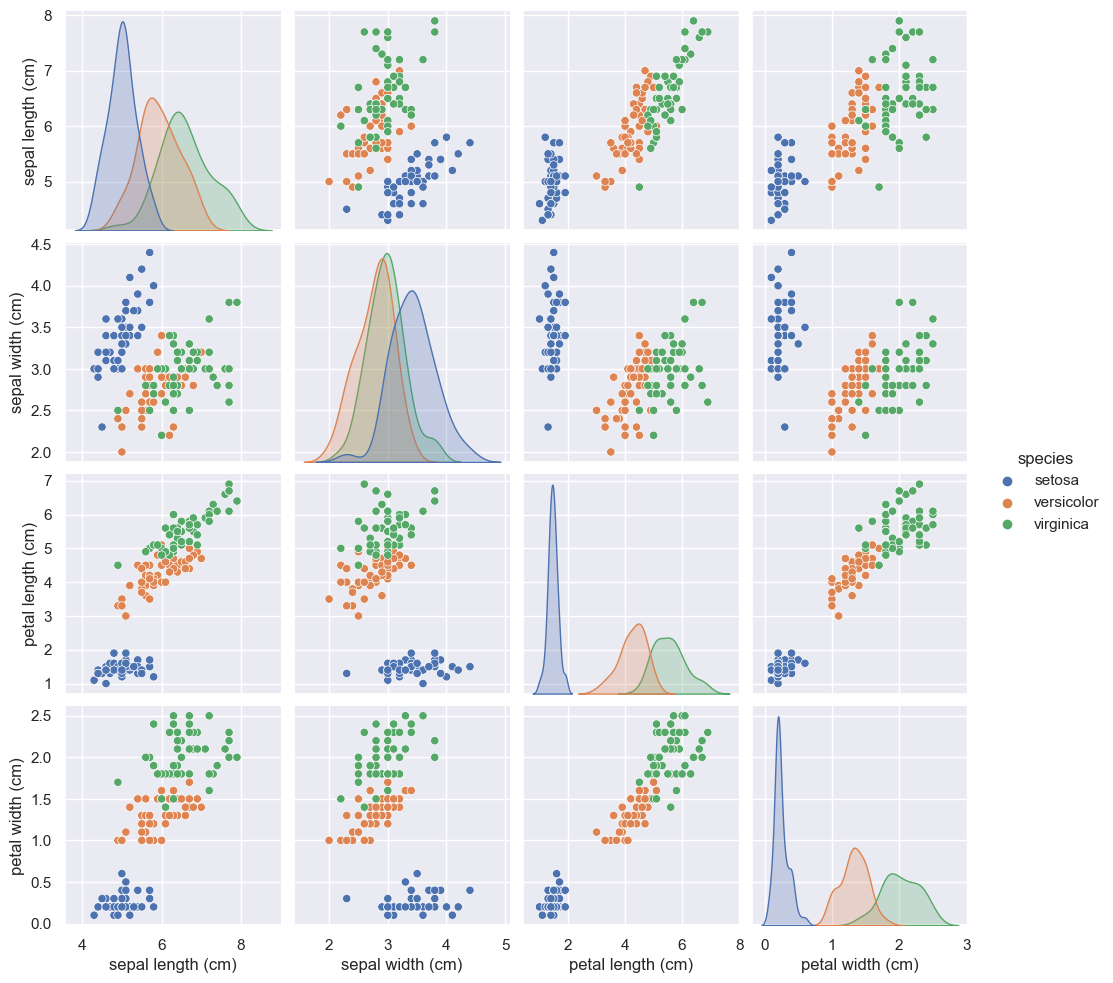

In [15]:
# seaborn pairplot based on flower species
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.

sns.pairplot(df, hue = 'species')

#### Split data into train and test dataset

In [26]:
# separate the target variable
X = df.iloc[:,0:4]
Y = df.iloc[:,4]

# split the data set into Test and Train
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state = 100, test_size = 0.3)

#### Decision Tree using scikit-learn

In [28]:
# Function to perform training with Entropy
# criterion = 'entropy: criteria we choose to construct decision tree
# random_state: to make the same random state everytime we run the code
# max_depth: decision tree will go down 3 layers deep before it stops
# min_sample_leaf: we gonna have at least 5 leaf at the end 

clf_entropy = DecisionTreeClassifier( criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [29]:
# Predict using test set data
y_pred = clf_entropy.predict(X_test)
print(y_pred)

['virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa']


In [30]:
# Evaluate the model: accuracy_model
# how many we get right vs how many we get wrong

accuracy_score(y_test,y_pred)
print("Accuracy of model: ", round(accuracy_score(y_test,y_pred)*100,2))

Accuracy of model:  95.56


#### Visualize the decision tree

In [31]:
# visualize the decision tree
from sklearn import tree
print(tree.export_text(clf_entropy))

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: versicolor
|   |--- feature_3 >  1.65
|   |   |--- feature_0 <= 5.95
|   |   |   |--- class: virginica
|   |   |--- feature_0 >  5.95
|   |   |   |--- class: virginica



In [42]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

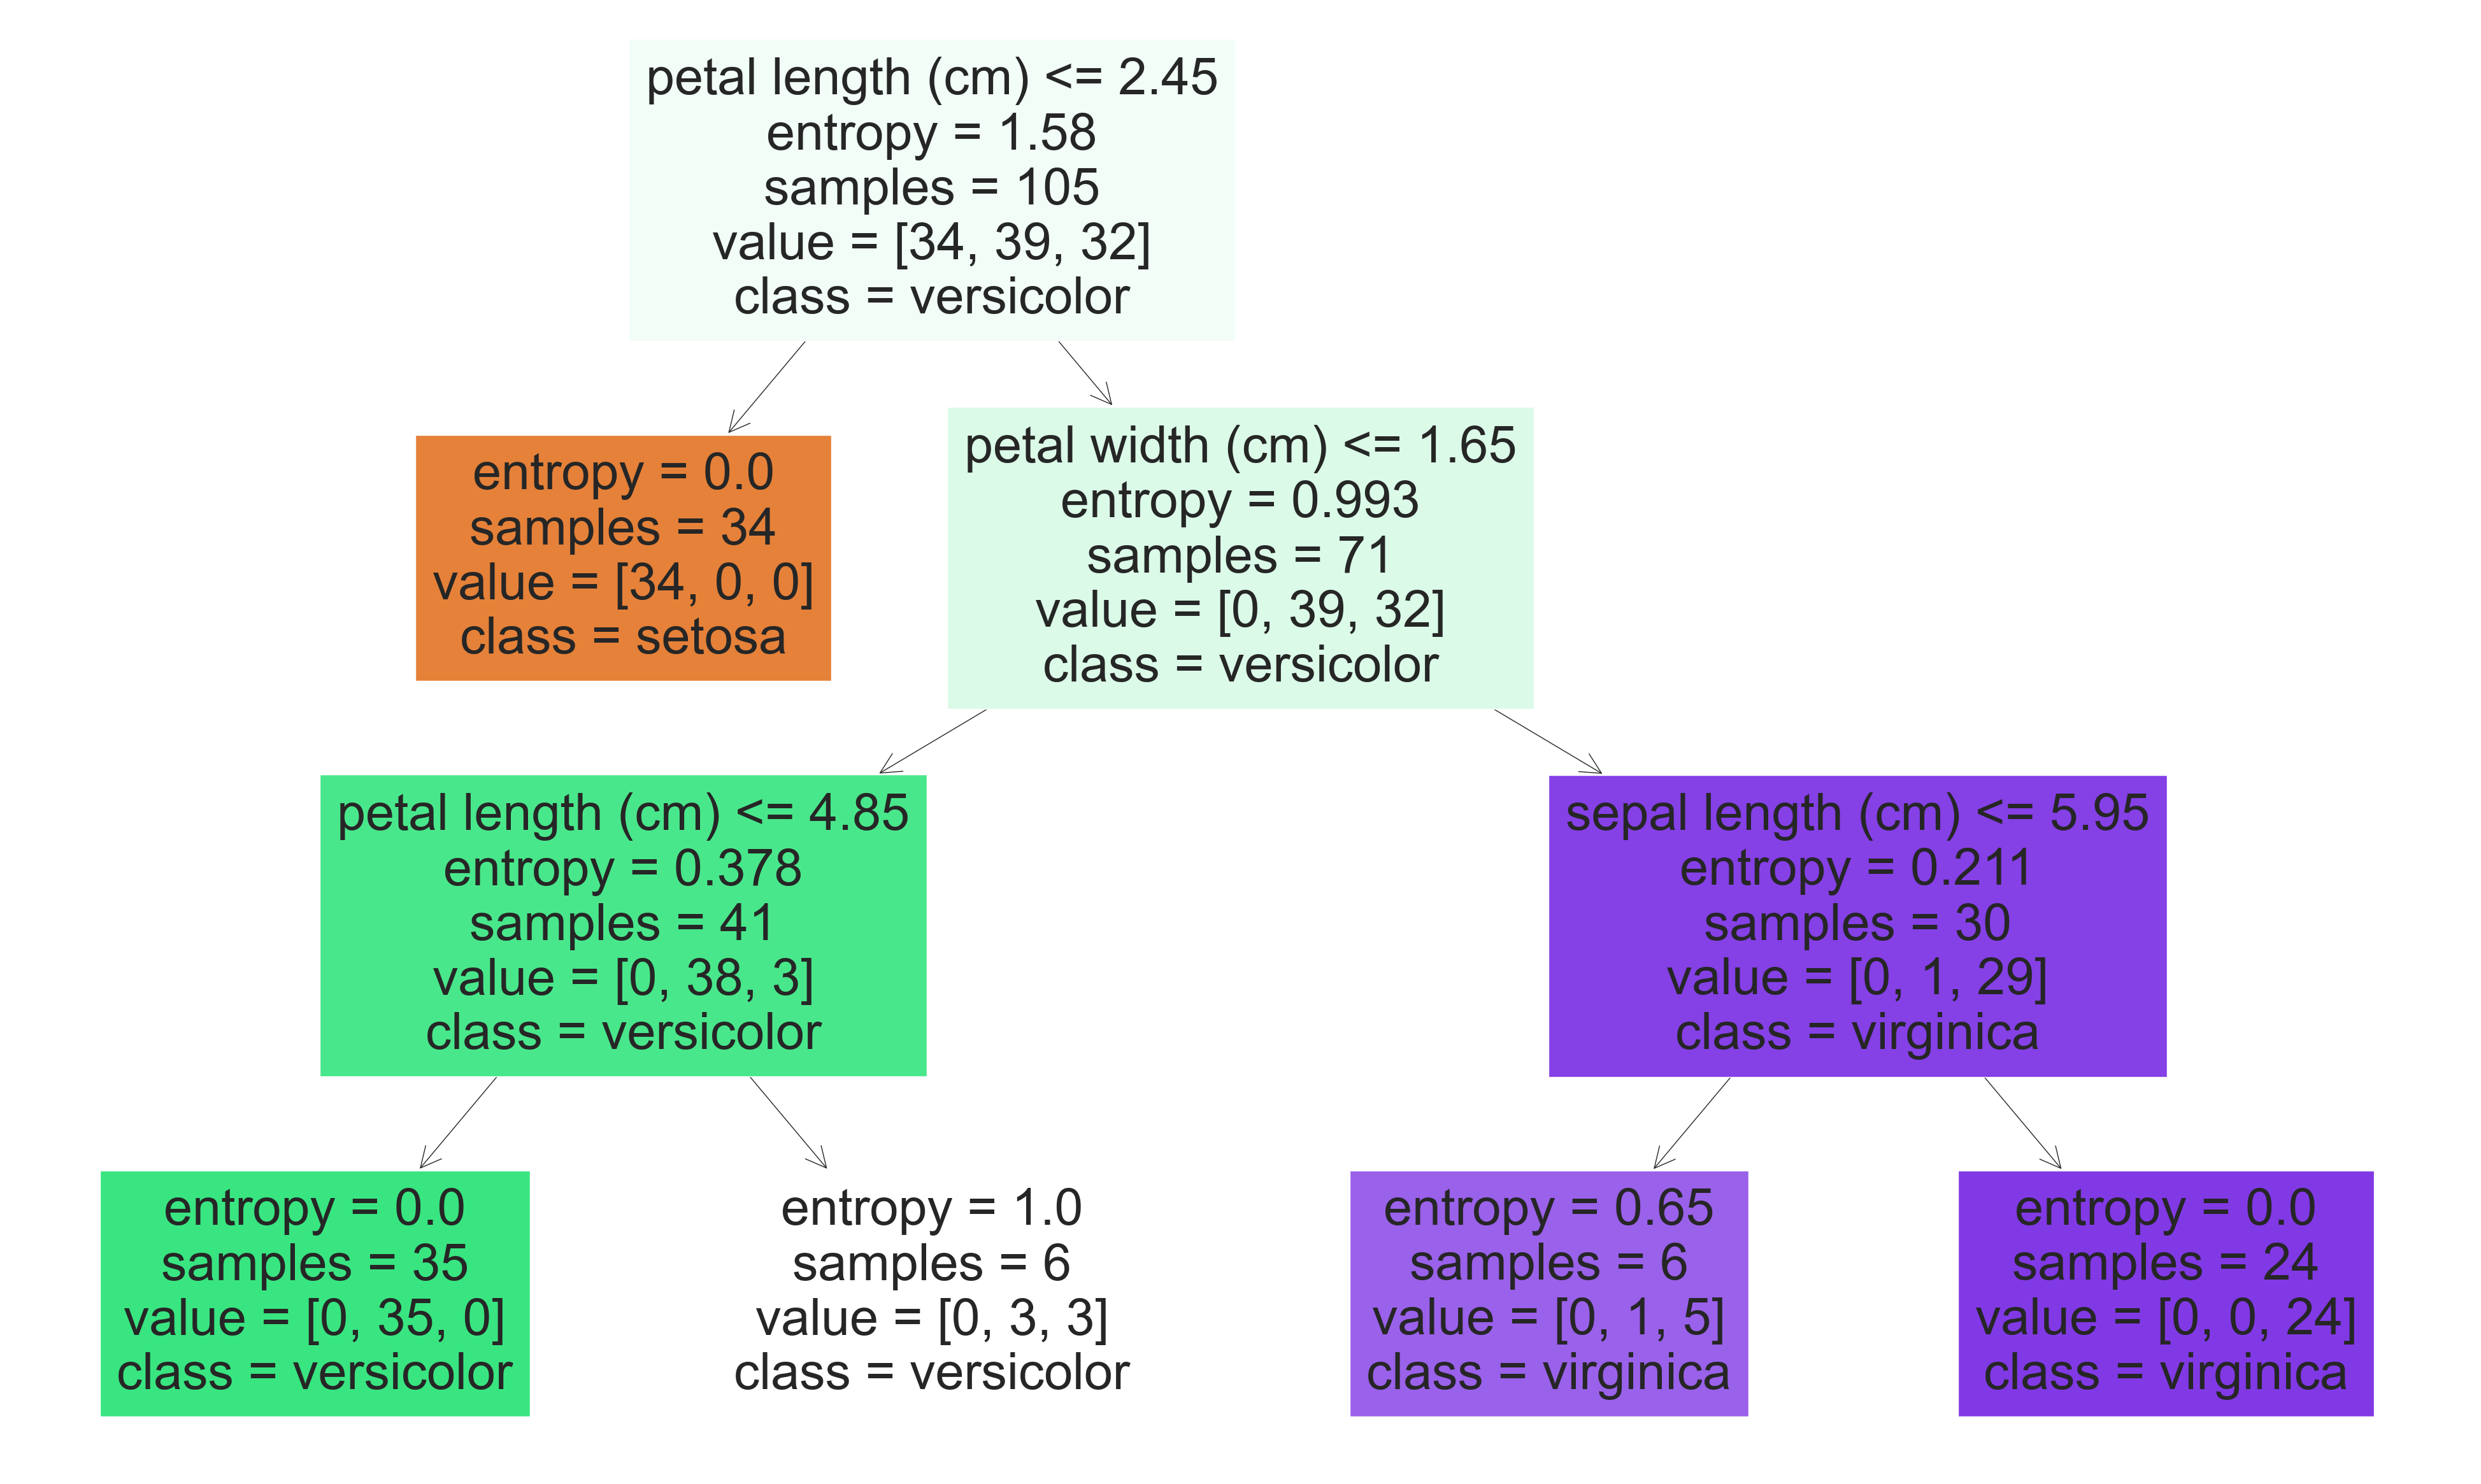

In [45]:
import matplotlib.pyplot as plt

df_feature_name = iris.feature_names
df_target_name = iris.target_names

plt.figure(figsize = (50,30)) 
_  =tree.plot_tree(clf_entropy, feature_names = df_feature_name, class_names = df_target_name, filled = True)

# yellow is 'no' data
# blue is 'yes' data

#### Predicting flower X species

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [50]:
# flower X data is as below

x1 = [[5.8, 3, 4.35, 1.3]]

In [52]:
# predicting flower X species using decision tree
# based on our prediction flower X's species will be versicolor

predx1 = clf_entropy.predict(x1)
predx1

C:\Users\Zikri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)